# EnerjiSA Veri Bilimi ve Analitiği Bootcamp - Ödev3

# 1. One hot encoding modelin görmediği veriye nasıl uygulanır?

Data setimizde numerik ve kategorik değişkenler bulunur. Kategorik değişkenlerin modelleme aşamasında doğru etkiyi gösterebilmesi için bu değişkenleri sayısallaştırmak adına farklı yöntemler uygulanır. Bu yöntemlerden biri olan one hot encoding, veri setindeki kategorik verilere uygulanan ve bunları makine öğrenimi algoritmalarında kullanılmak üzere ikili(binary) vektör gösterimine dönüştüren bir süreçtir.

<img src="ohe2.png" style = "width: auto; height: 250px">

One hot encoding'te modelin görmediği verilere özel bir kategori yapılır ve bu kategorideki veriler "ignore" olarak ayarlayarak işlenir. Bu parametre "ignore" olarak ayarlandığında ve dönüştürme sırasında bilinmeyen bir kategoriyle karşılaşıldığında, bu özellik için elde edilen tek etkin kodlanmış sütunların tümü 0(sıfır) olacaktır. Ters dönüşümde, bilinmeyen bir kategori Yok olarak gösterilecektir.

##### " handle_unknown{‘error’, ‘ignore’}, default=’error’

##### Whether to raise an error or ignore if an unknown categorical feature is present during transform (default is to raise). When this parameter is set to ‘ignore’ and an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.  "

###### Kaynak: (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

---------------

# 2. Label Encoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

Data setimizde bulunanan kategorik verilerin anlamlı sayısal değerlere dönüştürülmesinin bir diğer yöntemi label encoding'dir. Bu yöntemle kategorik değişkenler farklı sayılara atanır ve sayısal değerleri ölçüsünde yorum yapılır. Örneğin 3 değeri verilen değişken 1 değeri verilen değişkenden daha etkilidir denebilir. Örnek verecek olursak;

<img src="lenc3.png" style = "width: auto; height: auto"> 

Örnekte olduğu gibi data setinde bulunan eğitim durumu bilgisi eğitim seviyelerine göre numaralandırılabilir. Bu sayede tablodaki en yüksek eğitim durumu bilgisi olan doktora en yüksek sayısal değeri alır ve makine öğrenmesine bu yönde katkı sağlayabilir.

Başka bir örneğe bakacak olursak; 

<img src="lenc4.png" style = "width: auto; height: auto">

Poor, good, very good ve excellent olarak belirlenmiş kategorik değişkenlerin sayısallaştırılmasında poor 1, good 2, very good 3 ve excellent 4 değeri ile sayısallaştırıldığında veri setimize doğru beslemeyi yapmış olacağız.

Python'da label encoding için LabelEncoder kullanılır. Örneğin aşağıdaki örnekte verilen sütun değerleri alfabetik olarak label encoding işleminden geçirilmiştir. 

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


--------------------------

# 3. Imbalanced data sette train test split yaparken neleri göz önünde bulundurmalıyız?

Imbalanced veri setleri makine öğreniminde yaygın bir sorundur. Çoğu makine öğrenimi algoritması, her sınıftaki örnek sayısı hemen hemen eşit olduğunda en iyi sonucu verir. Bunun nedeni, çoğu algoritmanın doğruluğu en üst düzeye çıkarmak ve hatayı azaltmak için tasarlanmış olmasıdır.

Imbalanced data setlerde ilk önce perferomans metriklerinin değiştirilmesi ele alınır. Confusion matrix, precision değerleri ile f1_score ve recall_score değerleri çıkarılır ve yorumlamalar yapılır. Burada elde edilen değerlerin kesinliği belirlenir. Doğru sonuçlar elde edilemediği takdirde diğer aşamaya geçilir.

İkinci bir yöntem mevcut algoritmayı değiştirmek olabilir. Her veri setinde doğru sonuca ulaşabilmek için elbette birden fazla algoritma denenmeli ama imbalanced data setlerde bu durum daha önemlidir. Özellikle de decision tree ve random forest algoritmaları imbalanced data setlerde daha yararlı sonuçlar verebilmektedir.

Bir diğer yöntem olarak, imbalanced data setlerinde Resampling Technique kullanılabilir. Yeniden örnekleme olarak Türkçeye çevirebileceğimz bu teknikte iki ayrı metot vardır. Birincisi over sampling; data sette nispeten daha azınlıkta bulunan verilerin kopyalarının eklenmesi ile yapılır. Bu yöntem çalışmak için elimizde yeterli veri bulunmadığında işe yarayabilir,daha fazla örnekleme altında daha iyi performans gösterebilir. Ancak elimizde zaten fazlaca veri olduğunda zaman kaybı olacaktır. Diğer yöntem 
under sampling; data setinde çoğunlukta bulunan verilerden bazılarının kaldırılması yöntemidir. Bu yöntem train veri seti çok büyük olduğunda train verisi örneklerinin sayısını azaltarak çalışma süresini ve depolama sorunlarını iyileştirmeye yardımcı olabilir. Ancak veri çıkarma işlemi yapılırken yanlışlıkla önemli verilerin çıkarılması ve rastgele çıkarılan değerler sonucunda bias'li bir data sete sahip olma ihtimali bu yöntemin dezavantajlarındandır.

<img src="ous.png" style = "width: auto; height: 250px">


Diğer bir yöntem ise SMOTE olarak kısaltılan Synthetic Minority Oversampling Technique'tir. SMOTE, modelimizi eğitmek için kullanabileceğimiz yeni ve sentetik veriler oluşturmak için K-neighbors algoritmasını kullanır. Bu yöntemle örneklerin çoğaltılması yerine sentetik örnekler oluşturulduğundan, rastgele aşırı örneklemenin neden olduğu aşırı uyum sorununu azaltır ve undersampling 'de olduğu gibi yararlı bilgilerin kaybolma ihtimali yoktur.

<img src="smote.png" style = "width: auto; height: 250px">


---------------------------

# 4. Validation Data Seti (Modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?


<img src="dataset_split.png" style = "width: auto; height: 150px">

Validation Data Set, train sırasında model performansımızı doğrulamak için kullanılan train setinden ayrı bir veri setidir. Modelin hiperparametrelerini ve konfigürasyonlarını buna göre ayarlamamıza yardımcı olan bilgiler verir. Train'in doğru yönde ilerleyip ilerlemediğini bize söyler. Validation set oluşturulurken veri seti önce rastgele %80-%20 gibi bir oranla train ve test olarak ayrılır. Sonrasında train olarak ayrılmış alan tekrar aynı oranda train ve validation olarak ayrılır. İlk başta ayrılan test data setinde doğru sonuçlar elde edebilmek için validation datasetinde model parametrelerinin optimizasyonu yapılır. Bu ayrıma k-fold cross validation denir.

<img src="valid.png" style = "width: auto; height: 500px">

 Cross-validation, makine öğrenmesi modelinin görmediği veriler üzerindeki performansını mümkün olduğunca objektif ve doğru bir şekilde değerlendirmek için kullanılan istatistiksel bir yeniden örnekleme(resampling) yöntemidir. Aşağıdaki adımlar takip edilerek data predict'e hazır hale getirilir;
 
  - Veri seti rastgele olacak şekilde karıştırılır. (opsiyonel)
  - Veri seti k gruba ayrılır.
  - Her grup icin aşağıdaki adımlar uygulanır :
  - Seçilen grup validasyon seti olarak kullanılır.
  - Diğer tüm gruplar (k-1 grup) train seti olarak kullanılır.
  - Train seti kullanılarak model kurulur ve validasyon seti ile değerlendirilir.
  - Modelin değerlendirme puanı bir listede saklanır.


---------------------------

# 5.  predict_proba metoduyla oran nasıl hesaplanır ve threshold nasıl değiştirilir?

Scikit-learn kütüphanesinin bir methodu olan predict; regresyon, sınıflandırma, kümeleme gibi yöntemler kullanarak yapılan çalışmalarda tahmin edilen etiket bilgisini elde etmeye yarar.
Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıklarının hesaplanmasında da predict_proba fonksiyonunun kullanılır.


Sentetik classification problemimize bir lojistik regresyon modeli yerleştirebilir, ardından calss label'ı tahmin edebilir ve precision ve recall'ın harmonik ortalaması olan F-Measure'ı kullanarak bunları değerlendirebiliriz. Bu, lojistik regresyon modeli tarafından tahmin edilen olasılıkları yorumlarken 0,5 varsayılan eşiğini kullanacaktır.

In [56]:

# logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict labels
yhat = model.predict(testX)
# evaluate the model
score = f1_score(testy, yhat)
print('F-Score: %.5f' % score)

F-Score: 0.70130


Artık aynı modeli aynı veri setinde kullanabiliriz ve sınıf etiketlerini doğrudan tahmin etmek yerine olasılıkları tahmin edebiliriz.

In [57]:
...
# predict probabilities
yhat = model.predict_proba(testX)

Sadece pozitif sınıf için olasılıklara ihtiyacımız var.

In [58]:
# keep probabilities for the positive outcome only
probs = yhat[:, 1]

Olasılıkları değerlendirmek için bir dizi eşik tanımlayabiliriz. Bu durumda, 0.001 adım boyutuyla 0.0 ile 1.0 arasındaki tüm eşikleri test edeceğiz, yani 0.0, 0.001, 0.002, 0.003 ve böylece 0.999'a kadar test edeceğiz.

In [59]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

Tahmin edilen olasılıkları yorumlamak için tek bir threshold kullanma yoluna ihtiyacımız var. Bu, threshold'a eşit veya daha büyük tüm değerleri 1'e ve threshold'dan küçük tüm değerleri 0'a eşleyerek başarılabilir. Bunu yapmak için, olasılıkları ve threshold'u bir argüman olarak alacak ve geri dönecek bir to_labels() işlevi tanımlayacağız.

In [60]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

Daha sonra her threshold için bu işlevi çağırabilir ve f1_score() kullanarak elde edilen labelları değerlendirebiliriz.

In [61]:
# evaluate each threshold
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

In [63]:
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.251, F-Score=0.75556


-------------------------------------------------

# 6.  Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [137]:
# importing libraries
import numpy as np 
import pandas as pd 
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import random




In [138]:
#read the csv file
df = pd.read_csv('auto_insurance_csv.csv')

# drop the unneccassary column
df = df.drop(['_c39','Unnamed: 0'], axis = 1)

# fill null columns with "9999"
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")

# fill null columns with "MISSING"
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")

# convert columns to datetime
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)

# 'fraud_reported' is going to be our target column. We will convert it to 1 and 0.
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)

# group the 'umbrella_limit' columns as 0 - 9999 - other
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')

# group the 'hobiies' columns as chess - cross-fit - other    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

# fill the null values with 99999 of age column
# group age column
df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

# create a new column as 'age_group' instead of 'age'
df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

# create a new column as 'months_as_customer_groups' instead of 'months_as_customer'
df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

# create a new column as 'policy_annual_premium_groups' instead of 'policy_annual_premium'
df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

# drop the grouped columns
df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']

# create a new clean data frame just with required_columns as names 'df1'
df1 = df[required_columns]

C:\Users\sinan\AppData\Local\Temp/ipykernel_3660/2470930642.py:31: FutureWarning:

The default value of regex will change from True to False in a future version.



Veri setinde temizleme gruplama işlemlerinin ardından yeni bir data frame oluşturuldu ve bu data frame üzerinden train-validation-test split işlemleri yapılacak.

In [139]:
df1 = df1.drop(['incident_date'], axis=1)

In [140]:
df1.head()

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,53300,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,0,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,35100,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,48900,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,66000,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000


In [141]:
df1.columns

Index(['policy_state', 'policy_csl', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported',
       'claim_day_of_policy', 'location_check', 'age_group',
       'months_as_customer_groups', 'policy_annual_premium_groups',
       'policy_deductable_group'],
      dtype='object')

In [149]:
df3 = pd.get_dummies(df1, columns = columns_to_encode)

df3.head()

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,policy_annual_premium_groups_very low,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_high,policy_annual_premium_groups_very high,policy_deductable_group_0-500,policy_deductable_group_501-1000,policy_deductable_group_1001-1500,policy_deductable_group_1501-2000
0,466132,53300,0,5,1,1,2,71610,2004,1,...,0,0,0,1,0,0,0,1,0,0
1,468176,0,0,8,1,0,0,5070,2007,1,...,0,0,0,1,0,0,0,0,0,1
2,430632,35100,0,7,3,2,3,34650,2007,0,...,0,0,0,1,0,0,0,0,0,1
3,608117,48900,-62400,5,1,1,2,63400,2014,1,...,0,0,0,1,0,0,0,0,0,1
4,610706,66000,-46000,20,1,0,1,6500,2009,0,...,0,0,0,0,1,0,0,1,0,0


In [152]:
cols = df3.columns
num_cols = df3._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [157]:
# split the data into dependent and independent sets
features = []
for col in df3.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df3[features]
y = df3[target]

In [158]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [159]:
X

array([[-0.48952934,  1.01133064,  0.95385051, ...,  1.35978044,
         0.        , -0.66558354],
       [-0.46100805, -0.90192678,  0.95385051, ..., -0.73541284,
         0.        ,  1.50244101],
       [-0.98488451,  0.35802323,  0.95385051, ..., -0.73541284,
         0.        ,  1.50244101],
       ...,
       [-0.81513815,  0.35802323,  0.95385051, ..., -0.73541284,
         0.        , -0.66558354],
       [-0.83024997, -0.90192678,  0.95385051, ..., -0.73541284,
         0.        ,  1.50244101],
       [ 1.54949205, -0.90192678,  0.95385051, ...,  1.35978044,
         0.        , -0.66558354]])

---------------

## Modelling Data with SMOTE Technique

In [160]:
# Split data set into random train and test subsets

oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 1)


C:\Users\sinan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

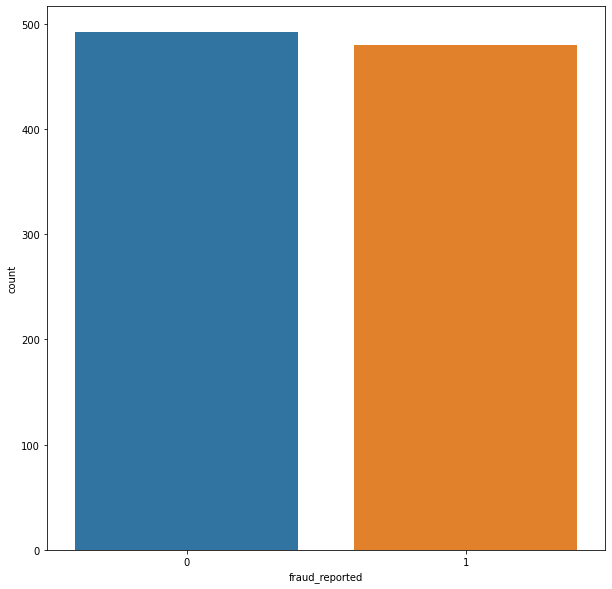

In [167]:
chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

## Logistic Regression

In [194]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.9590163934426229


0.9590163934426229

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       116
           1       0.96      0.96      0.96       128

    accuracy                           0.96       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244



<AxesSubplot:>

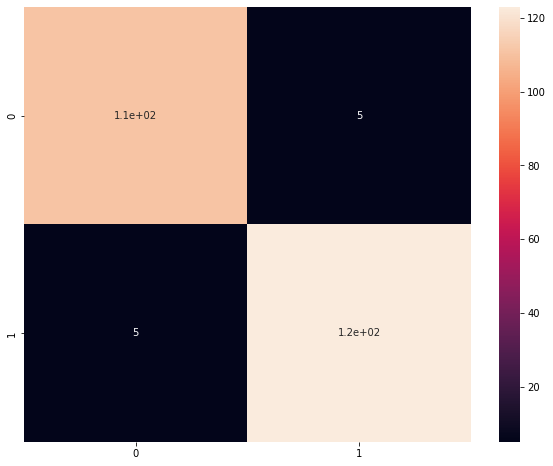

In [195]:
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

--------------

## Modelling the Data With Random Forest Classifier

- Accuracy: Bir modelin başarısını ölçmek için çok kullanılan ancak tek başına yeterli değildir. Accuracy değeri modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktır. Özellikle eşit dağılmayan veri kümelerinde model doğruluğu tek başına yeterli değildir
- Precision (Kesinlik): Positive olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Positive olduğunu göstermektedir.
- Recall (Duyarlılık): Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir.
- F1 Score: Precision ve Recall değerlerinin harmonik ortalamasını göstermektedir. Basit bir ortalama yerine harmonik ortalama olmasının sebebi ise uç durumları da gözardı etmememiz gerektiğidir. Eğer basit bir ortalama hesaplaması olsaydı Precision değeri 1 ve Recall değeri 0 olan bir modelin F1 Score’u 0.5 olarak gelecektir ve bu bizi yanıltacaktır. 
- Accuracy yerine F1 Score değerinin kullanılmasının en temel sebebi eşit dağılmayan veri kümelerinde hatalı bir model seçimi yapmamaktır. 

Training Accuracy:  1.0
Testing Accuarcy:  0.8852459016393442
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       116
           1       0.95      0.82      0.88       128

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.89      0.89      0.89       244



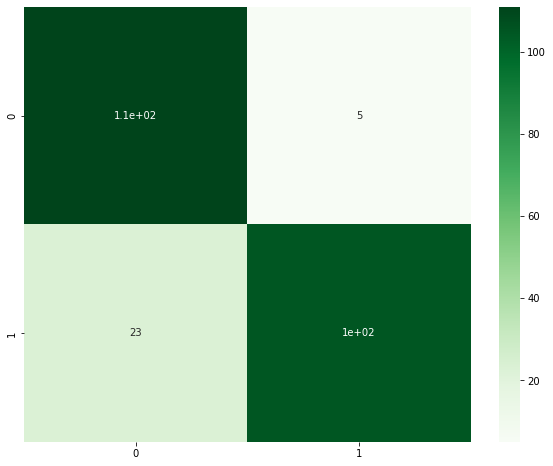

In [178]:
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators = 100, random_state = 72)

model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

print("Training Accuracy: ", model.score(X_train, y_train))
print('Testing Accuarcy: ', model.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (10, 8)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.show()

## Over Sampling with SMOTE

In [186]:
X_resample, y_resample  = oversample.fit_resample(X, y.values.ravel())

print(X_resample.shape)
print(y_resample.shape)

(1506, 1175)
(1506,)


In [187]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 0)


In [189]:
# standardization

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

C:\Users\sinan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\sinan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Training Accuracy:  1.0
Testing Accuarcy:  0.8807947019867549
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       154
           1       0.94      0.81      0.87       148

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.89      0.88      0.88       302



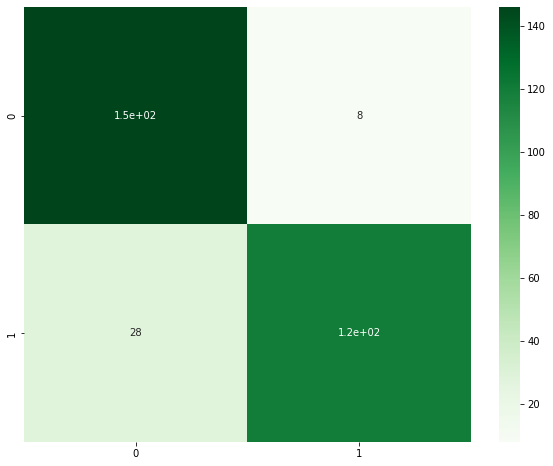

In [192]:
# Random Forest Classifier

model_o = RandomForestClassifier()
model_o.fit(X_train2, y_train2)

y_pred = model_o.predict(X_test2)

print("Training Accuracy: ", model_o.score(X_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(X_test2, y_test2))

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.show()

## Voting Classifier , Decision Tree, KNeighbors

In [196]:
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier

 
X3,y3= datasets.load_breast_cancer(return_X_y = True)
 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
 
LogReg = LogisticRegression() 
KNN=KNeighborsClassifier(n_neighbors = 4) 
dt = DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_leaf = 1)
 
classifiers = [ ('Logistic Regression', LogReg), 
('KNeighbors', KNN), 
('Decision Tree', dt) 
]
 
for name, model in classifiers: 
     model.fit(X3_train, y3_train) 
     y_pred2 = model.predict(X3_test) 
     acc = accuracy_score(y3_test, y_pred2) 
     print(name, acc)

Logistic Regression 0.9649122807017544
KNeighbors 0.9385964912280702
Decision Tree 0.9385964912280702


C:\Users\sinan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [199]:
# voting classifier

vc = VotingClassifier(estimators = classifiers, voting = 'hard')
 
vc.fit(X3_train, y3_train)
 
y_pred2 = vc.predict(X3_test)
 
vc_acc = accuracy_score(y3_test, y_pred2)
print("Voting Classifier: ", vc_acc)

Voting Classifier:  0.956140350877193


C:\Users\sinan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

